# 3주

### * 분류용 선형모델
- 결정 경계가 입력의 선형 함수
- 선, 평면, 초평면을 사용하여 두 개의 클래스를 분류하는 분류기
- LogisticRegression과 LinearSVC의 규제 강도 C에 의해 규제 감소 또는 증가

### * 다중 클래스 분류용 선형 모델
- 이진 분류 알고리즘을 확장하는 일대다 방법 구현
- 각 클래스마다 하나의 계수 벡터와 절편 동일
- 빠른 학습 속도와 예측, 샘플보다 특성의 경우 잘 동작한다.
- 저차원 데이터셋의 경우, 다른 모델의 일반화 성능이 우수하다.

In [1]:
# 분류형 선형모델 실습
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    rc('font', family='AppleGothic')

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


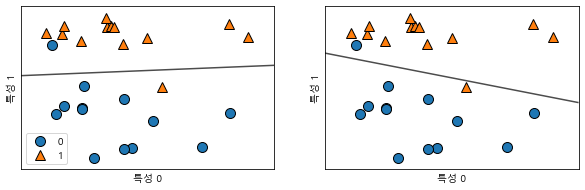

In [2]:
# 결정 경계
# 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정
# 그리고 사용할 수 있는 규제가 있는지 확인
import mglearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1,2,figsize=(10,3))
for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

# L2 규제 적용
# C값이 감소 혹은 증가에 따라 규제 정도의 차이가 심해진다.

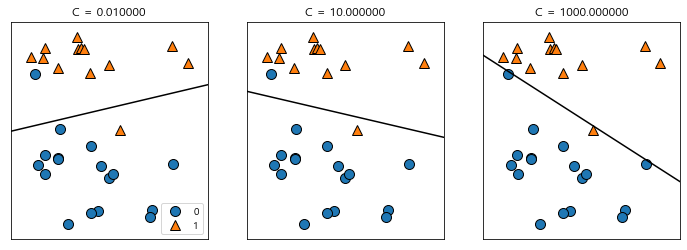

In [3]:
# C값이 감소할 경우, 데이터 포인트 중 다수의 형태에 맞춰진다.
# C값이 증가할 경우, 각각 개별적으로 정확한 분류가 이루어진다.
mglearn.plots.plot_linear_svc_regularization()

In [4]:
# 과소적합
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수 : 0.958
테스트 세트 점수 : 0.958


In [5]:
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수 : 0.984
테스트 세트 점수 : 0.965


In [6]:
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수 : 0.953
테스트 세트 점수 : 0.951


C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


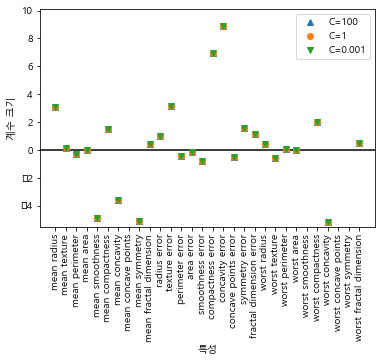

In [7]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg100.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5.5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

C=0.001인 l1 로지스틱 회귀의 훈련 정확도 : 0.91
C=0.001인 l1 로지스틱 회귀의 테스트 정확도 : 0.92
C=1.000인 l1 로지스틱 회귀의 훈련 정확도 : 0.96
C=1.000인 l1 로지스틱 회귀의 테스트 정확도 : 0.96
C=100.000인 l1 로지스틱 회귀의 훈련 정확도 : 0.99
C=100.000인 l1 로지스틱 회귀의 테스트 정확도 : 0.98


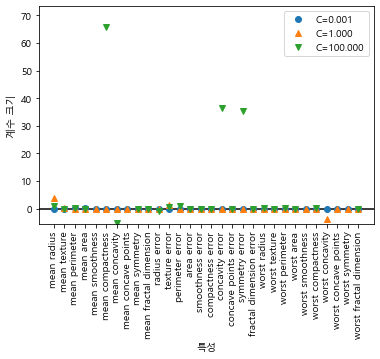

In [8]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    # solver의 기본값은 'lbfgs'이다. L1 규제 지원을 안한다.
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver='liblinear', max_iter=1000).fit(X_train, y_train)
    print("C={:.3f}인 l1 로지스틱 회귀의 훈련 정확도 : {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("C={:.3f}인 l1 로지스틱 회귀의 테스트 정확도 : {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5.5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

# 　

### * 나이브 베이즈
- 선형 모델과 유사한 모델
- LogisticRegression, LinearSVC보다 빠른 훈련 속도, 일반화 성능은 처진다.
- 각 특성 개별 취급하여 파라미터 학습
- 각 특성에서 클래스별 통계를 단순히 취합

### * Sickit-learn 구현 분류기
- 빠른 훈련과 예측 속도
- 이해력 높은 훈련 과정
- 고차원 데이터 적용 가능

1) Gaussian NB
- 연속적 데이터 숫자 및 데이터 사용에 적용하는 분류기
- 클래스별 각 특성 표준편차와 평균 계산
- 고차원 데이터셋에 사용한다.

2) Bernoulli NB
- 이진 데이터 및 텍스트 데이터 적용
- 복잡도 조절 alpha 변수가 1개
- Alpha가 주어지면 알고리즘이 모든 특성에 양의 값을 가진 가상의 데이터 포인트를 해당 갯수만큼 추가한다 => 완만한 통계 데이터 생성
- Alpha가 크면 완만, 낮은 모델 복잡도

3) Multinomial NB
- 카운트 데이터 및 텍스트 데이터
- 클래스별 특성 평균 계산
- 복잡도 조절 alpha 변수가 1개
- Alpha가 주어지면 알고리즘이 모든 특성에 양의 값을 가진 가상의 데이터 포인트를 해당 갯수만큼 추가한다 => 완만한 통계 데이터 생성
- Alpha가 크면 완만, 낮은 모델 복잡도

In [9]:
# 가우시안 나이브 베이즈 분류기 실습
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
import numpy as np

dataset = load_iris()
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df['target'] = dataset.target # 레이블을 데이터 프레임에 저장
df.target = df.target.map({0:"setosa", 1:"versicolor", 2:"virginica"})
# 숫자 형태의 결과를 문자로 볼 수 있도록 처리해주는 부분

df.head()

# sepal length : 꽃받침의 길이
# sepal width : 꽃받침의 너비
# petal length : 꽃잎의 길이
# petal width : 꽃잎의 너비

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


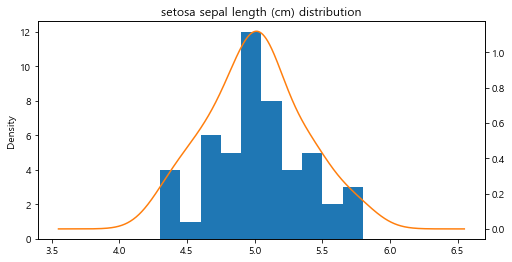

In [10]:
# 분포도를 시각화
setosa_df = df[df.target == "setosa"]
versicolor_df = df[df.target == "versicolor"]
virginica_df = df[df.target == "virginica"]
# 꽃받침의 길이를 기준으로 분포도

ax = setosa_df['sepal length (cm)'].plot(kind='hist')
setosa_df['sepal length (cm)'].plot(kind='kde', ax=ax, secondary_y=True, 
title = "setosa sepal length (cm) distribution", figsize=(8,4))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2)
# 전체 데이터 중에서 테스트 데이터를 20% 비율로 조정

model = GaussianNB()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)
print(metrics.classification_report(y_test, predicted))
# 분류 성능 체크

accuracy_score(y_test, predicted)
# 정확도 체크


# 선형모델과 비슷
# 특성별로 파라미터를 적용하여 이것을 학습하고 통계를 내여 취합한다.
# => 간단하면서도 정확하게 효율적으로 사용할 수 있는 분류기이다.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.80      1.00      0.89        12
           2       1.00      0.73      0.84        11

    accuracy                           0.90        30
   macro avg       0.93      0.91      0.91        30
weighted avg       0.92      0.90      0.90        30



0.9

In [12]:
# 베루누이 나이브 베이즈 분류기 실습
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

email_list = [
    {'email title' : 'free game only today', 'spam':True},
    {'email title' : 'cheapest flight deal', 'spam':True},
    {'email title' : 'limited time offer only today only today', 'spam':True},
    {'email title' : 'today meeting schedule', 'spam':False},
    {'email title' : 'your flight schedule attached', 'spam':False},
    {'email title' : 'your credit card statement', 'spam':False}
]

df = pd.DataFrame(email_list)
df['label'] = df['spam'].map({True:1, False:0})
# 베르누이 나이브 베이즈 분류기는 숫자형태만 처리한다.

# 이메일 제목으로 학습을 진행한다.
# 레이블은 label 사용하여 제목으로 스팸 판별
df_x = df["email title"]
df_y = df["label"]

# 입력데이터는 고정된 크기의 벡터로 구성
cv = CountVectorizer(binary = True)
x_traincv = cv.fit_transform(df_x)

# 이메일 제목이 어떻게 벡터로 인코딩되었는지 확인
encoded_input = x_traincv.toarray()
encoded_input

array([[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]], dtype=int64)

In [13]:
# 고정된 크기의 벡터에 포함된 단어를 확인
cv.inverse_transform(encoded_input[0])

[array(['free', 'game', 'only', 'today'], dtype='<U9')]

In [14]:
# 고정된 벡터에서 인덱스 역할 또는 의미
cv.get_feature_names()

['attached',
 'card',
 'cheapest',
 'credit',
 'deal',
 'flight',
 'free',
 'game',
 'limited',
 'meeting',
 'offer',
 'only',
 'schedule',
 'statement',
 'time',
 'today',
 'your']

In [15]:
# 베르누이 분류기 적용
bnb = BernoulliNB()
y_train = df_y.astype('int')
bnb.fit(x_traincv, y_train)

# 스무딩 기능을 지원한다. 
# 학습 데이터에 없던 테스트 데이터에 있어도 분류가 가능하다.

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [16]:
# 테스트 데이터를 베르누이 나이브 베이즈의 입력 데이터로 수정
test_email_list = [
    {'email title' : 'free game only today', 'spam':True},
    {'email title' : 'cheapest flight deal', 'spam':True},
    {'email title' : 'limited time offer only today only today', 'spam':True},
    {'email title' : 'today meeting schedule', 'spam':False},
    {'email title' : 'your flight schedule attached', 'spam':False},
    {'email title' : 'your credit card statement', 'spam':False}
]

test_df = pd.DataFrame(test_email_list)
test_df['label'] = test_df['spam'].map({True:1, False:0})
test_x = test_df["email title"]
test_y = test_df["label"]
x_testcv=cv.transform(test_x)

predictions = bnb.predict(x_testcv)

#정확도 체크
accuracy_score(test_y, predictions)

1.0

# 　

### * 결정 트리
- 분류와 회귀 문제에 널리 사용하는 모델
- 결정에 다다르기 위해 예/아니오 질문으로 학습

#### * 모든 리프 노드 : 순수 노드가 될 떄까지 진행
    -> 복잡한 모델, 훈련 데이터에 과대적합
=> 훈련 세트의 모든 데이터 포인트를 정확한 클래스의 리프 노드에 위치

### * 과대적합 방지 전략
- 트리 생성을 일찍 중단(사전 가지치기) -> 트리의 깊이, 최대 갯수 제한
- 트리 생성 후 데이터 포인트가 적은 노트 삭제 및 병합(사후 가지치기) => 포인트의 최소 갯수 지정

### * 결정트리의 장단점
1) 장점
- 만들어진 모델의 쉬운 시각화
- 데이터 스케일 구애를 받지 않음 -> 특성의 정규화나 표준화 등 전처리가 필요하지 않음
- 서로 다른 특성 스케일, 이진 특성과 연속적인 특성의 혼합일 경우 동작한다.

2) 단점
- 사전 가지치기 실시 후에도 과대적합되는 경향 -> 낮은 일반화 성능

In [2]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


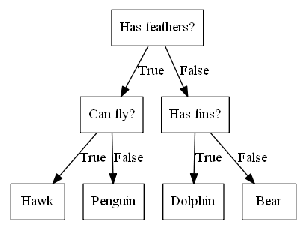

In [9]:
# 결정 트리 실습
# import graphvix
from sklearn.tree import DecisionTreeClassifier
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn

mglearn.plots.plot_animal_tree()

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state = 42)
# 기본값 설정 -> 완전한 트리 -> 모든 리프 노드가 순수 노드가 될 때까지 생성한 트리

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.937


In [12]:
# 사전 가지치기
# max_depth : 질문의 갯수 -> 과대적합 조절
tree = DecisionTreeClassifier(max_depth = 4, random_state = 0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.951


In [11]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
               feature_names = cancer.feature_names, impurity=False, filled=True)

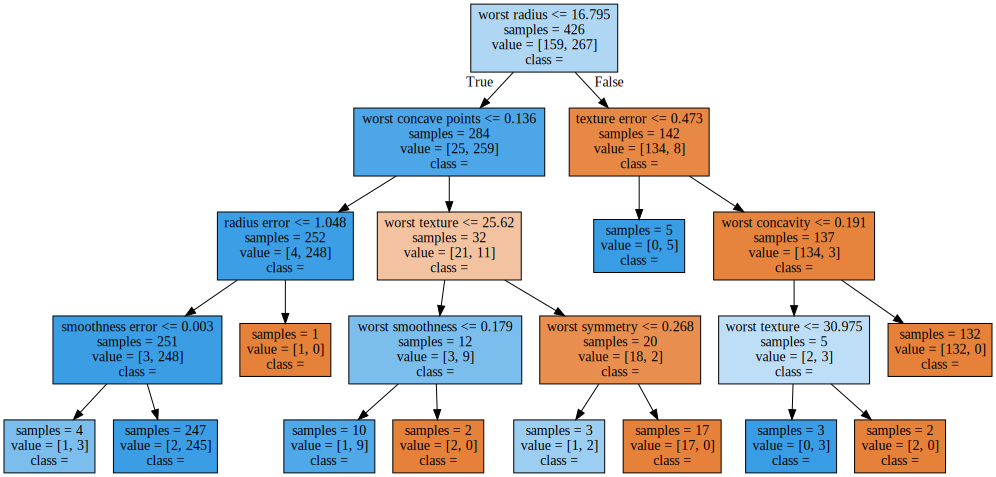

특성 중요도 : 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [13]:
import graphviz

with open("tree.dot", encoding="UTF8") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

print("특성 중요도 : \n", tree.feature_importances_)

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current

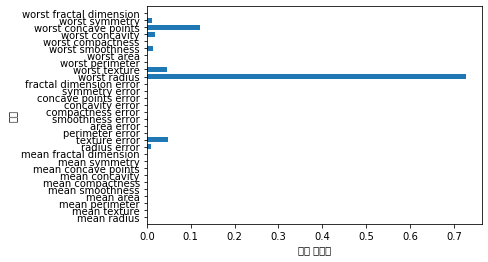

In [14]:
import matplotlib.pyplot as plt

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


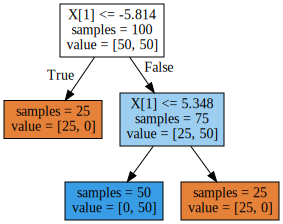

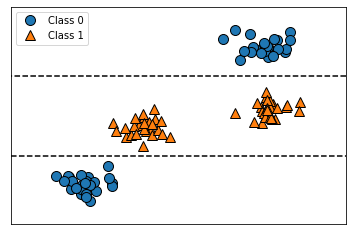

In [15]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)